In [86]:
import os
from skimage.io import imread
from skimage.color import label2rgb, gray2rgb
import matplotlib.pyplot as plt

In [7]:
from defects_dlmbl.segment_affinities import *

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
os.chdir('/home/funkl/defects_DLMBL/')

In [23]:
affinities = imread('experiments/images/98000_affinity.tif')

In [88]:
gt = imread('experiments/images/98000_gt.tif')

In [101]:
image = imread('experiments/images/98000_image.tif')

In [24]:
affinities.shape

(2, 256, 256)

In [25]:
affinity_image = affinities

In [26]:
affs = np.stack([
    np.zeros_like(affinity_image[0]),
    affinity_image[0],
    affinity_image[1]]
)
# waterz agglomerate requires 4d affs (c, d, h, w) - add fake z dim
affs = np.expand_dims(affs, axis=1)

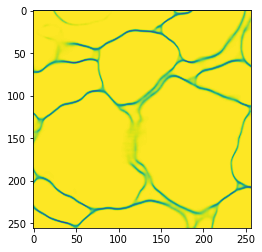

In [27]:
plt.imshow(affinities[0])

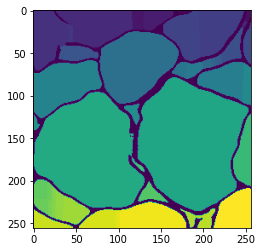

In [28]:
plt.imshow(watershed_from_affinities(affs)[0])

In [29]:
affs.shape

(3, 1, 256, 256)

In [30]:
affs.max(axis=(-2,-1))

array([[0.],
       [1.],
       [1.]], dtype=float32)

In [31]:
affs.min(axis=(-2,-1))

array([[0.        ],
       [0.28087094],
       [0.34047008]], dtype=float32)

In [32]:
mean_affs = (affs[1] + affs[2])*0.5#>1.9
depth = mean_affs.shape[0]

In [33]:
mean_affs.shape

(1, 256, 256)

In [34]:
depth

1

In [35]:
max_affinity_value=1
z=0

In [74]:
boundary_mask = mean_affs[z]>0.995*max_affinity_value
boundary_distances = distance_transform_edt(boundary_mask)

In [75]:
boundary_mask.max()

True

In [76]:
boundary_mask.min()

False

In [77]:
mean_affs.max()

1.0

In [78]:
mean_affs.min()

0.4004658

In [79]:
np.unique(boundary_mask,return_counts=True)

(array([False,  True]), array([12083, 53453]))

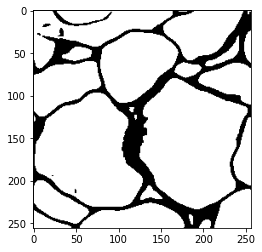

In [80]:
plt.imshow(boundary_mask,cmap='gray')

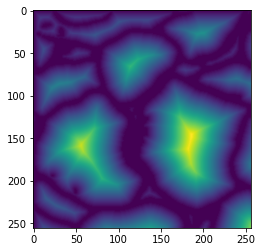

In [81]:
plt.imshow(boundary_distances)

In [82]:
labels = watershed_from_boundary_distance(boundary_distances,boundary_mask)

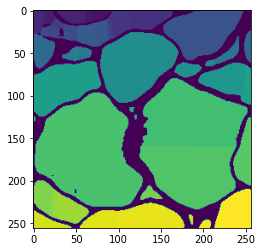

In [83]:
plt.imshow(labels[0])

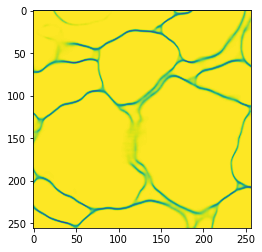

In [84]:
plt.imshow(affinities[0])

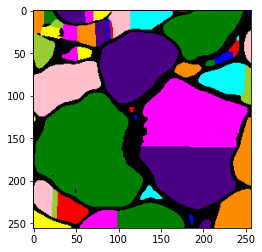

In [85]:
plt.imshow(label2rgb(labels[0],bg_label=0))

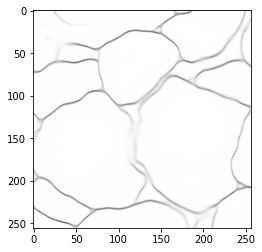

In [87]:
plt.imshow(gray2rgb(affinities[0]))

In [89]:
gt.shape

(1, 256, 256)

/tmp/ipykernel_15347/2775806345.py:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  plt.imshow(label2rgb(gt[0]))


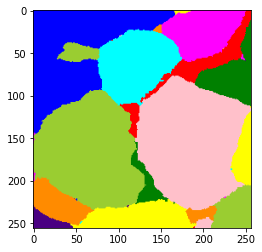

In [92]:
plt.imshow(label2rgb(gt[0]))

In [106]:
image.shape

(1, 256, 256)

In [108]:
image.max()

184.0

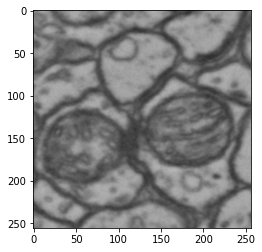

In [111]:
plt.imshow(gray2rgb(image[0].astype('uint8')))

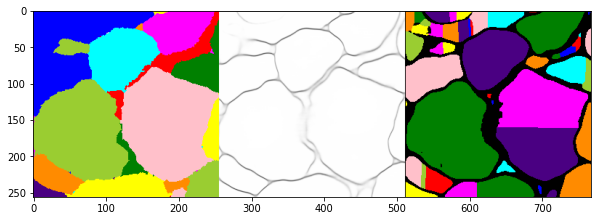

In [114]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(np.concatenate([label2rgb(gt[0],bg_label=0),
                          gray2rgb(affinities[0]),
                          label2rgb(labels[0],bg_label=0)],axis=1))